
- Use scikitlearn or other python packages to compare the performance of types of Na¨ıve
Bayesian classifiers with the help of accuracy scores. Use Spambase dataset in the
question, which you can access using the URL: [https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data](https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data)


## Train-Test Split Without Sklearn


- Split the dataset into two parts as training data and test data. first 80 percent samples should be selected as training data and last 20 percent samples should
be selected as test data.
-Please save these training and test datasets for remaining
parts. Compute the confusion matrix and the accuracy of test data for Gaussian
and Multinomial Naive Bayes Classifiers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(path, header=None) # no header row

In [ ]:
train_size = int(0.8 * data.shape[0])

# Split the data into training and test data
train_data = data.iloc[:train_size, :]
test_data = data.iloc[train_size:, :]

X_Train = train_data.iloc[:, :-1]
Y_Train = train_data.iloc[:, -1]

X_Test = test_data.iloc[:, :-1]
Y_Test = test_data.iloc[:, -1]

In [ ]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3680 non-null   float64
 1   1       3680 non-null   float64
 2   2       3680 non-null   float64
 3   3       3680 non-null   float64
 4   4       3680 non-null   float64
 5   5       3680 non-null   float64
 6   6       3680 non-null   float64
 7   7       3680 non-null   float64
 8   8       3680 non-null   float64
 9   9       3680 non-null   float64
 10  10      3680 non-null   float64
 11  11      3680 non-null   float64
 12  12      3680 non-null   float64
 13  13      3680 non-null   float64
 14  14      3680 non-null   float64
 15  15      3680 non-null   float64
 16  16      3680 non-null   float64
 17  17      3680 non-null   float64
 18  18      3680 non-null   float64
 19  19      3680 non-null   float64
 20  20      3680 non-null   float64
 21  21      3680 non-null   float64
 22  

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_Train, Y_Train)
gaussian_nb_predictions = gaussian_nb.predict(X_Test)

In [ ]:
def plot_2confusionMs(cm1: np.array, cm2: np.array, title1: str, title2: str, Title_size: int = 20) -> None:

    """
    Plots two confusion matrices.

    Args:
        cm1 (np.array): The first confusion matrix.
        cm2 (np.array): The second confusion matrix.
        title1 (str): The title of the first confusion matrix.
        title2 (str): The title of the second confusion matrix.
        Title_size (int, optional): The size of the titles. Defaults to 20.

    Returns:
        None.
    """

    # Set the plot style
    plt.style.use("fivethirtyeight")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Display the 1st confusion matrix
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=multinomial_nb.classes_)
    disp1.plot(ax=ax1)
    ax1.set_title(title1, size=Title_size)
    ax1.grid(False)

    # Display the  2nd confusion matrix
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=multinomial_nb.classes_)
    disp2.plot(ax=ax2)
    ax2.set_title(title2, size=Title_size)
    ax2.grid(False)

    # Show the plots
    plt.show()



Classification report for Gaussian Naive Bayes classifier:
+---------------------+---------+
| Metric              |   Score |
+=====================+=========+
| Accuracy            | 82.0847 |
+---------------------+---------+
| Precision (Overall) | 85.7803 |
+---------------------+---------+
| Recall (Overall)    | 82.0847 |
+---------------------+---------+
| F1 Score (Overall)  | 82.2029 |
+---------------------+---------+



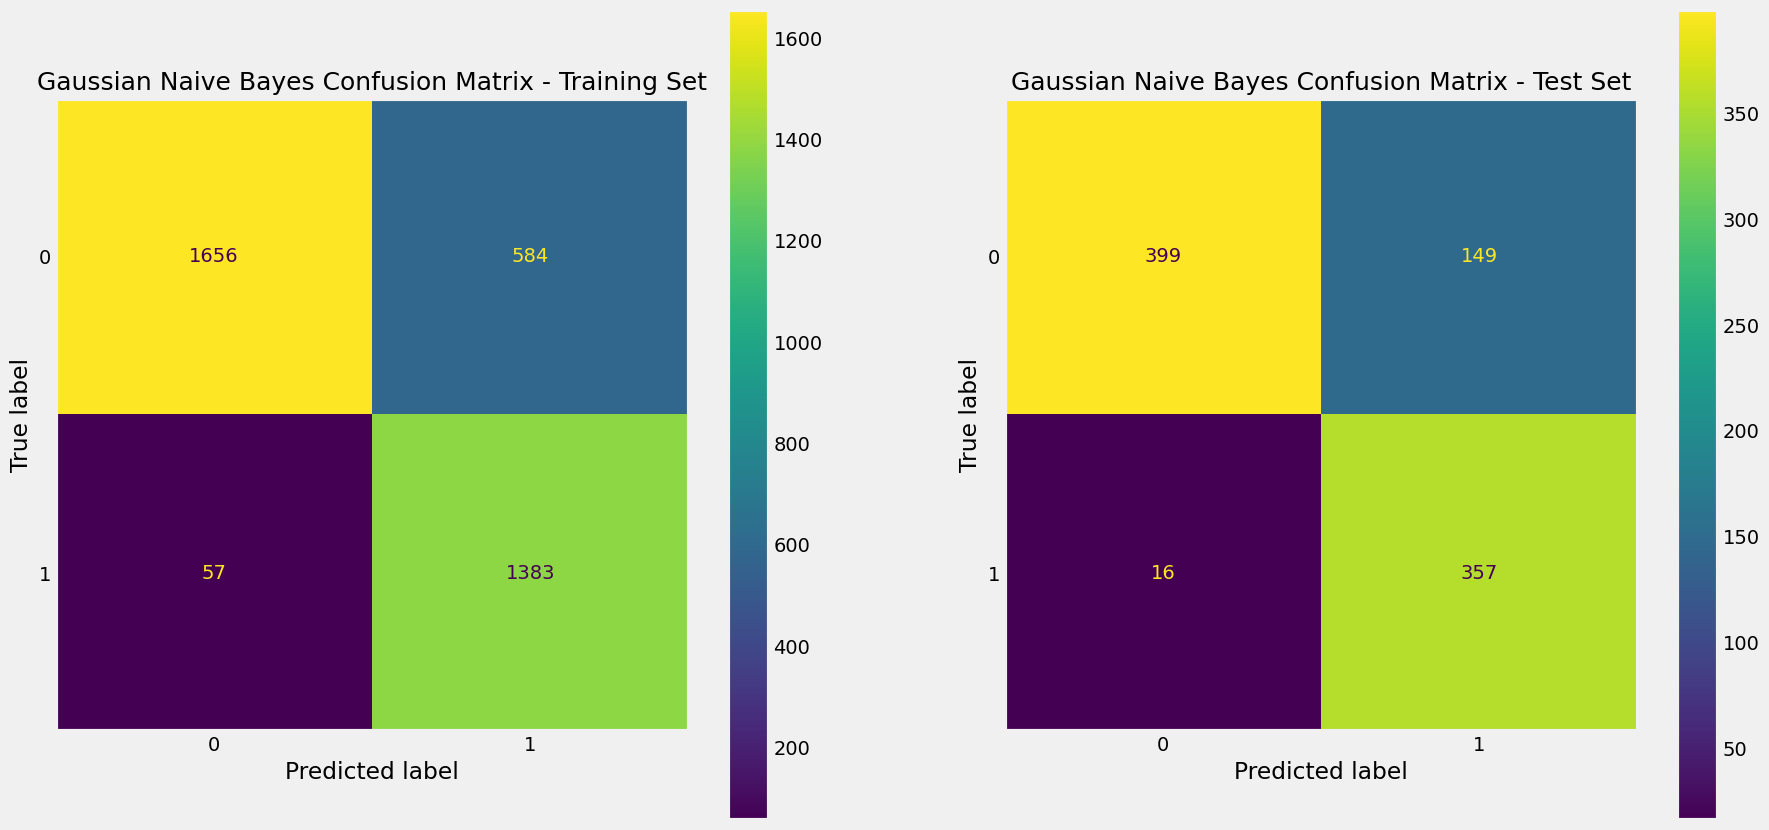

In [ ]:
def model_scores(y_true, y_pred, verbose=False):
    """
    Calculates and prints the accuracy, precision, recall, and fscore for a given model.

    Args:
        y_true (list): The true labels.
        y_pred (list): The predicted labels.
        verbose (bool): Whether to print the scores.

    Returns:
        list: A list of the scores.
    """

    # Calculate accuracy, precision, recall, and fscore
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average=None)

    # Calculate overall precision, recall, and fscore
    overall_precision = sum(precision * support) / sum(support)
    overall_recall = sum(recall * support) / sum(support)
    overall_fscore = sum(fscore * support) / sum(support)

    # Create a list of the scores
    scores = [
        ("Metric", "Score"),
        ("Accuracy", accuracy * 100),
        ("Precision (Overall)", overall_precision * 100),
        ("Recall (Overall)", overall_recall * 100),
        ("F1 Score (Overall)", overall_fscore * 100),
    ]

    # Print the scores if verbose is True
    if verbose:
        print(tabulate(scores, headers="firstrow", tablefmt="grid"))
        print()

    return scores



print("Classification report for Gaussian Naive Bayes classifier:")
model_scores(Y_Test, gaussian_nb_predictions, verbose=True)

# Calculate the confusion matrix for the training set
gaussian_nb_cm_train = confusion_matrix(Y_Train, gaussian_nb.predict(X_Train))

# Calculate the confusion matrix for the test set
gaussian_nb_cm_test = confusion_matrix(Y_Test, gaussian_nb.predict(X_Test))

plot_2confusionMs(gaussian_nb_cm_train, gaussian_nb_cm_test, "Gaussian Naive Bayes Confusion Matrix - Training Set", "Gaussian Naive Bayes Confusion Matrix - Test Set", 18)

Classification report for Multinomial Naive Bayes classifier:
+---------------------+----------+
| Metric              |    Score |
+=====================+==========+
| Accuracy            |  72.3127 |
+---------------------+----------+
| Precision (Overall) | 100      |
+---------------------+----------+
| Recall (Overall)    |  72.3127 |
+---------------------+----------+
| F1 Score (Overall)  |  83.9319 |
+---------------------+----------+



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


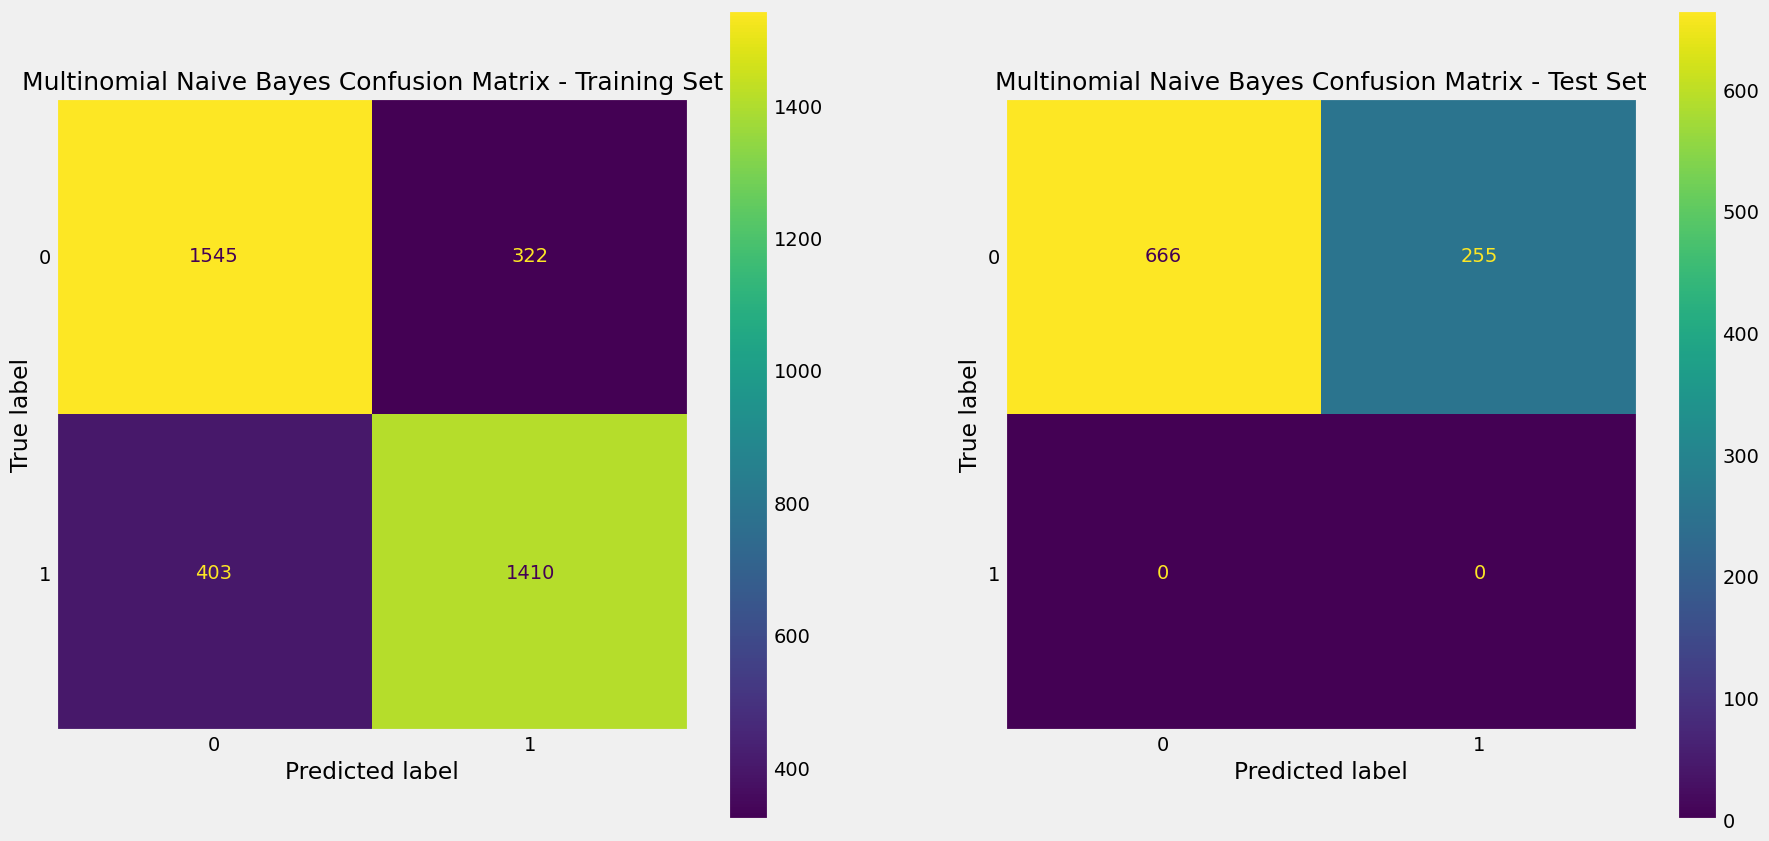

In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_Train, Y_Train)
multinomial_nb_predictions = multinomial_nb.predict(X_Test)

print("Classification report for Multinomial Naive Bayes classifier:")
model_scores(Y_Test, multinomial_nb_predictions, verbose=True)


# Calculate the confusion matrix for the training set
multinomial_nb_cm_train = confusion_matrix(Y_Train, multinomial_nb.predict(X_Train))

# Calculate the confusion matrix for the test set
multinomial_nb_cm_test = confusion_matrix(Y_Test, multinomial_nb.predict(X_Test))

plot_2confusionMs(multinomial_nb_cm_train, multinomial_nb_cm_test, "Multinomial Naive Bayes Confusion Matrix - Training Set", "Multinomial Naive Bayes Confusion Matrix - Test Set", 18)


## Train-Test Split using Sklearn

- Use train test split function on input and output of the whole data and utilize 80% of samples as train and 20% of samples as test data. Please save these training and test datasets for remaining parts.
- After selecting the training andtest dataset, compute the confusion matrix and the accuracy of test data for Gaussian and Multinomial Naive Bayes Classifiers.

In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(path,header=None,index_col=False)

# Shuffle the dataset
df = df.sample(frac=1, random_state=32)
df.reset_index()

# Train-Test spliting
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_Train, Y_Train)
gaussian_nb_predictions = gaussian_nb.predict(X_Test)

Classification report for Gaussian Naive Bayes classifier:
+---------------------+---------+
| Metric              |   Score |
+=====================+=========+
| Accuracy            | 82.0847 |
+---------------------+---------+
| Precision (Overall) | 85.7803 |
+---------------------+---------+
| Recall (Overall)    | 82.0847 |
+---------------------+---------+
| F1 Score (Overall)  | 82.2029 |
+---------------------+---------+



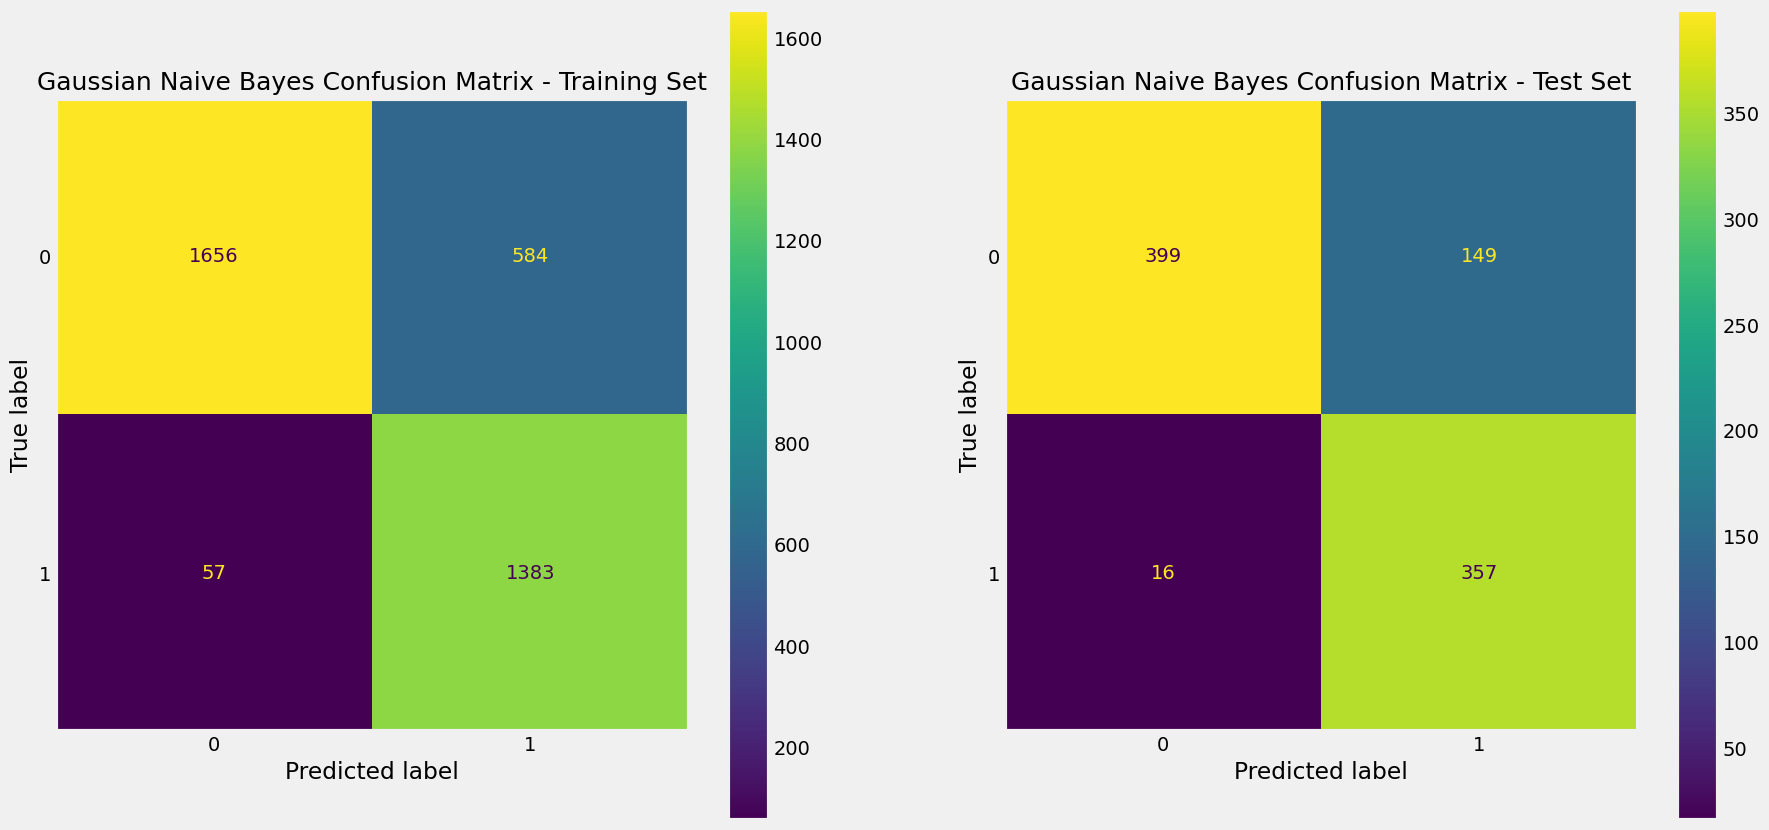

In [ ]:
print("Classification report for Gaussian Naive Bayes classifier:")
model_scores(Y_Test, gaussian_nb_predictions, verbose=True)

# Calculate the confusion matrix for the training set
gaussian_nb_cm_train = confusion_matrix(Y_Train, gaussian_nb.predict(X_Train))

# Calculate the confusion matrix for the test set
gaussian_nb_cm_test = confusion_matrix(Y_Test, gaussian_nb.predict(X_Test))

plot_2confusionMs(gaussian_nb_cm_train, gaussian_nb_cm_test, "Gaussian Naive Bayes Confusion Matrix - Training Set", "Gaussian Naive Bayes Confusion Matrix - Test Set", 18)

Classification report for Multinomial Naive Bayes classifier:
+---------------------+---------+
| Metric              |   Score |
+=====================+=========+
| Accuracy            | 78.1759 |
+---------------------+---------+
| Precision (Overall) | 78.0248 |
+---------------------+---------+
| Recall (Overall)    | 78.1759 |
+---------------------+---------+
| F1 Score (Overall)  | 78.0409 |
+---------------------+---------+



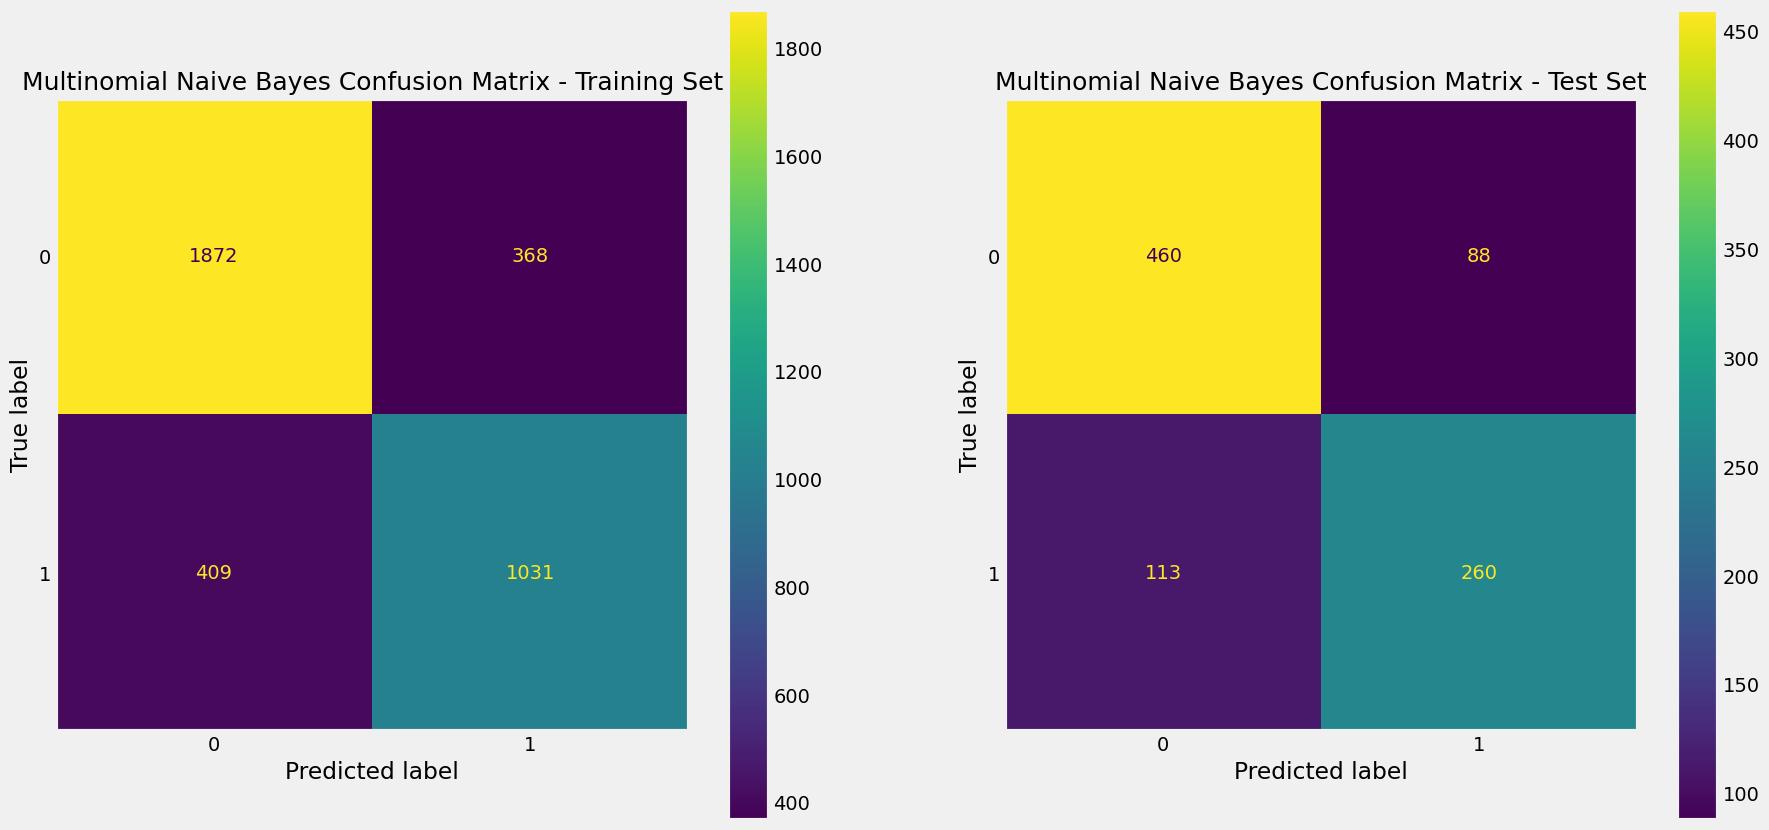

In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_Train, Y_Train)
multinomial_nb_predictions = multinomial_nb.predict(X_Test)

print("Classification report for Multinomial Naive Bayes classifier:")
model_scores(Y_Test, multinomial_nb_predictions, verbose=True)


# Calculate the confusion matrix for the training set
multinomial_nb_cm_train = confusion_matrix(Y_Train, multinomial_nb.predict(X_Train))

# Calculate the confusion matrix for the test set
multinomial_nb_cm_test = confusion_matrix(Y_Test, multinomial_nb.predict(X_Test))

plot_2confusionMs(multinomial_nb_cm_train, multinomial_nb_cm_test, "Multinomial Naive Bayes Confusion Matrix - Training Set", "Multinomial Naive Bayes Confusion Matrix - Test Set", 18)


## Results Refinement
- Use another Naive Bayes classifier of your choice to check for the improvement in terms of accuarcy score of test data in (b) over Gaussian and Multinomial asked in (b) and provide an explanation for the improvement in performance (if any).
- Also, provide classification report in terms of precision, recall and F1-score
and display the confusion matrix for only the selected classifier.

Classification report for Bernoulli Naive Bayes classifier:
+---------------------+---------+
| Metric              |   Score |
+=====================+=========+
| Accuracy            | 88.5993 |
+---------------------+---------+
| Precision (Overall) | 88.6171 |
+---------------------+---------+
| Recall (Overall)    | 88.5993 |
+---------------------+---------+
| F1 Score (Overall)  | 88.5157 |
+---------------------+---------+



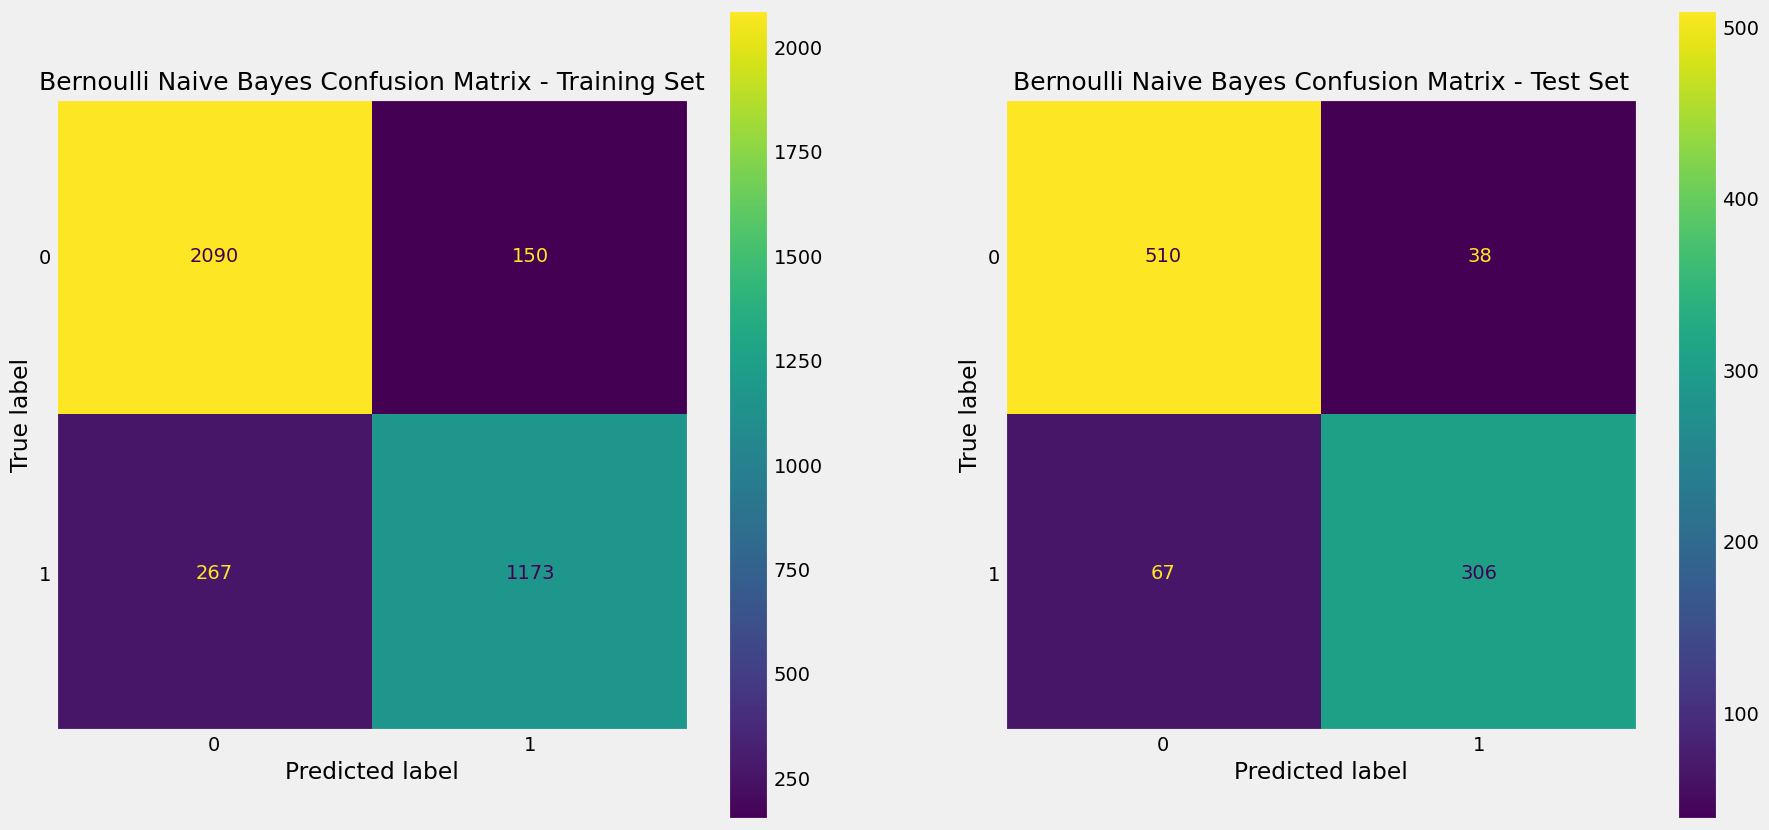

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Fit the classifier to the training data
bnb.fit(X_Train, Y_Train)

# Make predictions on the test data
bnb_predict = bnb.predict(X_Test)

# Print the classification report
print("Classification report for Bernoulli Naive Bayes classifier:")
model_scores(Y_Test, bnb_predict, verbose=True)

# Calculate the confusion matrix for the training set
bernoulli_nb_cm_train = confusion_matrix(Y_Train, bnb.predict(X_Train))

# The confusion matrix for the test set
bernoulli_nb_cm_test = confusion_matrix(Y_Test, bnb.predict(X_Test))
plot_2confusionMs(bernoulli_nb_cm_train, bernoulli_nb_cm_test, "Bernoulli Naive Bayes Confusion Matrix - Training Set", "Bernoulli Naive Bayes Confusion Matrix - Test Set", 18)



> We decided to use the Bernolli NB which is much better in binary classfication

**The Improvment:**

- Accuracy: The Gaussian classifier scored 82.08% accuracy, the Multinomial classifier scored 78.61% accuracy, and the Bernoulli classifier scored 88.06% accuracy.

- Precision: In terms of both classes and total precision, the Bernoulli classifier is superior.

- F1 Score: The highest F1 score belongs to the Bernoulli classifier, which indicating that it has the best recall and precision ratio. It does a better job of accurately categorising spam and non-spam communications without favouring any one element above others (false positives or false negatives).

- Due to the characteristics of the data and the model assumptions, the performance of the Bernoulli Naive Bayes classifier has improved. In this instance, it may be because the characteristics of the data set more closely resemble a Bernoulli distribution than a Gaussian or Multinomial distribution.

## Split the Training data into 4 equal subsets

- Take same first 80 percent as asked in (a) training samples and split the data
into four equal parts according to order such as the first 25% of training data
(subset 1), the second 25% of training data (subset 2), the third 25% oftraining
data (subset 3) and the fourth 25% of training data (subset 4).
- Train selectedPage 2classifier chosen in (c) for each subset and predict the accuracy score by evaluating on last 20 percent of test data assumed in (a). Plot bar chart to show all subsets’ accuracy on the figure. Add your comment

In [ ]:
import numpy as np

# Split the training data into 4 subsets
subset_1, subset_2, subset_3, subset_4 = np.array_split(train_data, 4)

subset_1_X = subset_1.iloc[:, :-1]
subset_1_Y = subset_1.iloc[:, -1]

subset_2_X = subset_2.iloc[:, :-1]
subset_2_Y = subset_2.iloc[:, -1]

subset_3_X = subset_3.iloc[:, :-1]
subset_3_Y = subset_3.iloc[:, -1]

subset_4_X = subset_4.iloc[:, :-1]
subset_4_Y = subset_4.iloc[:, -1]

Accuracy for subset 1: 0.40
Accuracy for subset 2: 0.86
Accuracy for subset 3: 0.60
Accuracy for subset 4: 0.60


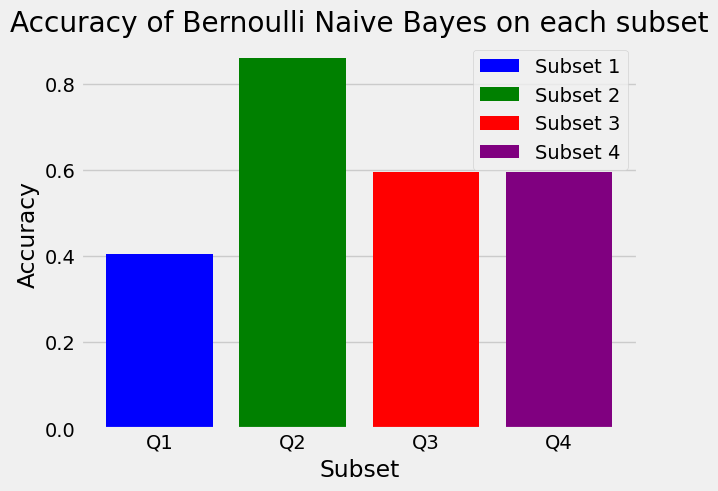

In [ ]:
# Create the BernoulliNB classifier
bernoulli_nb = BernoulliNB()

# Create a list to store the accuracy scores
accuracy_scores = []

# Iterate over the subsets
for i, (X, Y) in enumerate([(subset_1_X, subset_1_Y), (subset_2_X, subset_2_Y),
                             (subset_3_X, subset_3_Y), (subset_4_X, subset_4_Y)], 1):

    # Fit the classifier to the data
    bernoulli_nb.fit(X, Y)

    # Predict the labels of the test data
    predictions = bernoulli_nb.predict(X_Test)

    # Calculate the accuracy
    accuracy = accuracy_score(Y_Test, predictions)

    # Add the accuracy to the list
    accuracy_scores.append(accuracy)

    # Print the accuracy
    print(f"Accuracy for subset {i}: {accuracy:.2f}")

# Set the colors and labels for the bar chart
colors = ['blue', 'green', 'red', 'purple']
labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4']

# Create the bar chart
for i in range(4):
    plt.bar(i+1, accuracy_scores[i], color=colors[i], label=labels[i])

# Add a legend
plt.legend()

# Add labels to the x-axis
plt.xlabel('Subset')
plt.ylabel('Accuracy')
plt.title('Accuracy of Bernoulli Naive Bayes on each subset')

# Add x-axis ticks
plt.xticks(range(1, 5), x_axis)

# Add a grid to the x-axis
plt.grid(axis='x')

# Show the plot
plt.show()